## prepare数据

In [2]:
import pandas as pd

df = pd.read_csv("../data/course-8-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
x = df[['X0', 'X1']].values
y = df['Y'].values

## 算法实现

在 scikit-learn 中，实现逻辑回归的类及默认参数是：[document](https://scikit-learn.org/1.4/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [5]:
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=0.001, max_iter=10000, solver='liblinear')  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

In [11]:
model.score(x, y)

0.9933333333333333

## 结果展示

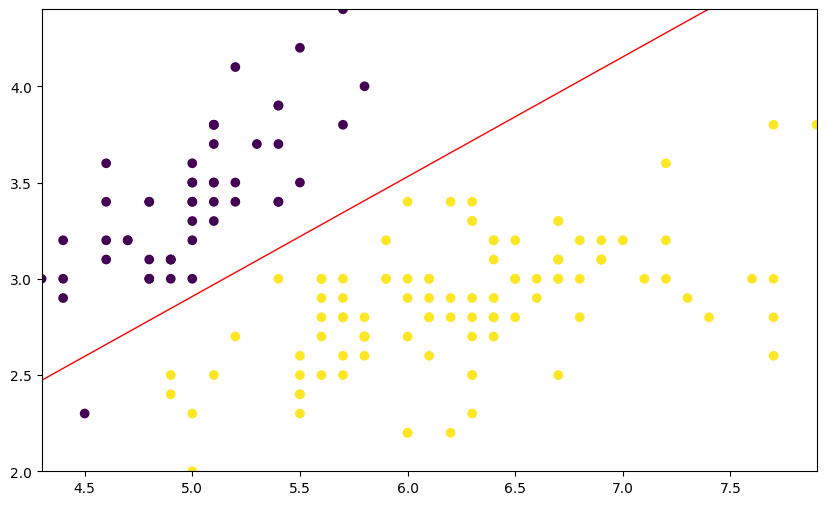

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")